# Dataset Exploration
In this notebook, we explore the 98 segmentation datasets.

In [1]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 26})

import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys
sys.path.append("../")

from tqdm import tqdm
from itertools import product

In [2]:
from src.clasp_test import load_combined_dataset

Let's load and list the datasets.

In [3]:
df_ts = load_combined_dataset()
df_ts

,name,window_size,change points,time_series
0,Cane,100,[2345],"[-0.3205028, -0.37070978, -0.393024, -0.252165..."
1,DutchFactory,24,[2184],"[1022.0, 1038.0, 1036.0, 1026.0, 1039.0, 1046...."
2,EEGRat,10,[1000],"[-0.1671106, -0.035091142, -0.074696981, -0.33..."
3,EEGRat2,10,[1000],"[-1.0569423, -0.90092768, -0.66900428, -0.5340..."
4,Fetal2013,70,"[6000, 12000]","[219.0, 186.0, 157.0, 143.0, 130.0, 119.0, 140..."
5,GrandMalSeizures,10,[8200],"[24.0, 22.0, 22.0, 23.0, 23.0, 20.0, 22.0, 22...."
6,GrandMalSeizures2,10,[4550],"[-14.0, 34.0, 8.0, -13.0, -31.0, 15.0, 95.0, -..."
7,GreatBarbet1,50,"[1900, 3700]","[1.9344661, 1.8379655, 2.0245261, 1.8343236, 2..."
8,GreatBarbet2,50,"[1900, 3700]","[3.1691109, 0.94084073, 0.44849608, 0.37819022..."
9,InsectEPG1,50,[3802],"[0.22095, 0.21729, 0.19043, 0.12451, -0.032959..."


Let's visualize by time series length, amount of change points and window size.

In [4]:
names = df_ts.name.to_numpy().tolist()

for idx, name in enumerate(names):
    if name == "PigInternalBleedingDatasetAirwayPressure":
        names[idx] = "PigAirwayPressure"
        
    if name == "PigInternalBleedingDatasetArtPressureFluidFilled":
        names[idx] = "PigFluidFilled"
        
    if name == "PigInternalBleedingDatasetCVP":
        names[idx] = "PigCVP"
        
    if name == "ChlorineConcentration":
        names[idx] = "Chlorine"
        
    if name == "DiatomSizeReduction":
        names[idx] = "DiatomSize"
        
    if name == "DistalPhalanxOutlineAgeGroup":
        names[idx] = "DistalPhalanx"
        
    if name == "InsectWingbeatSound":
        names[idx] = "InsectWingbeat"
        
    if name == "LargeKitchenAppliances":
        names[idx] = "LargeKitchen"
        
    if name == "NonInvasiveFetalECGThorax1":
        names[idx] = "ECGThorax1"
        
    if name == "NonInvasiveFetalECGThorax2":
        names[idx] = "ECGThorax2"
        
    if name == "ProximalPhalanxOutlineAgeGroup":
        names[idx] = "ProximalPhalanx"
        
names = np.array(names)

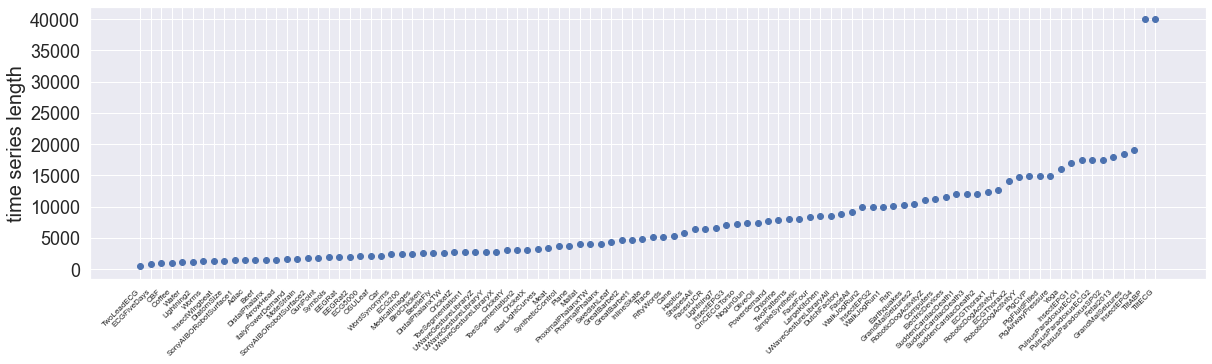

In [5]:
fontsize = 18

idx_sizes = np.argsort(df_ts.time_series.apply(len)).to_numpy()
_, ax = plt.subplots(1, figsize=(20,5))
ax.scatter(np.arange(df_ts.shape[0]), df_ts.time_series.apply(len).to_numpy()[idx_sizes])
ax.set_ylabel("time series length", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.xticks(range(df_ts.shape[0]), names[idx_sizes], rotation = 45, ha="right", fontsize=8)

plt.show()

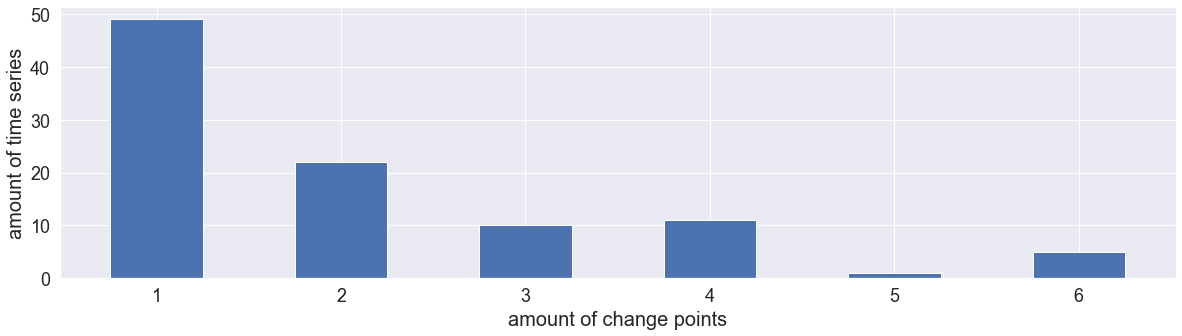

In [6]:
fontsize = 18

change_points, counts = np.unique(df_ts["change points"].apply(len), return_counts=True)
_, ax = plt.subplots(1, figsize=(20,5))
ax.bar(change_points, counts, width=.5)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xlabel("amount of change points", fontsize=20)
ax.set_ylabel("amount of time series", fontsize=20)

plt.show()

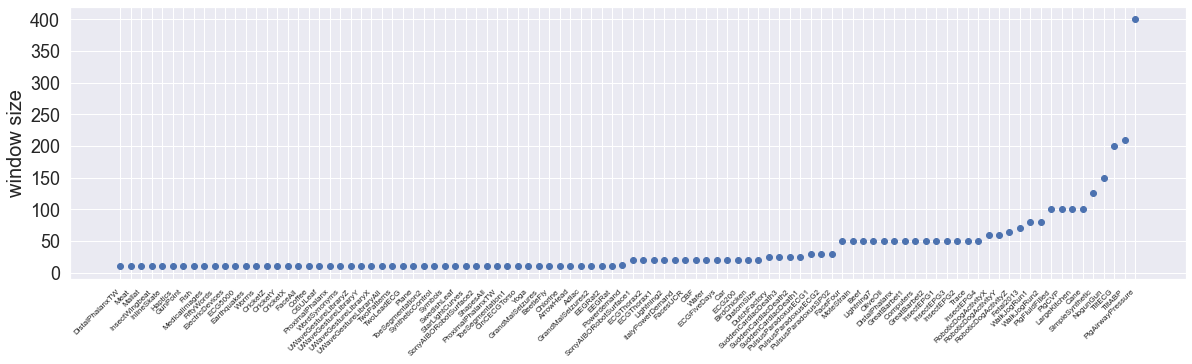

In [7]:
fontsize = 18

idx_sizes = np.argsort(df_ts.window_size.to_numpy())
_, ax = plt.subplots(1, figsize=(20,5))
ax.scatter(np.arange(df_ts.shape[0]), df_ts.window_size.to_numpy()[idx_sizes])
ax.set_ylabel("window size", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.xticks(range(df_ts.shape[0]), names[idx_sizes], rotation = 45, ha="right", fontsize=8)

plt.show()